In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pickle
import requests
import json

# Dataset:  IMDb movies.csv

Source: Stefano Leone (2020). "IMDb movies extensive dataset", Kaggle, https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset/version/2?select=IMDb+movies.csv

Description: 81k+ movies and 175k+ cast members scraped from IMDb.


In [2]:
# Read the csv file into a pandas DataFrame

movies = pd.read_csv('Resources/IMDb movies.csv')
movies.info()

C:\Users\mdsiy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [3]:
# Extract items "title", "year", "country", "avg_vote", "budget" & "worlwide_gross_income"
movies_tygcvbi = movies[["title", "year", "genre", "country", "avg_vote", "budget", "worlwide_gross_income"]]

# Remove NaN values
movies_tygcvbi = movies_tygcvbi.dropna()

# Removing items "TV Movie 2019" from cloumn "year"
movies_tygcvbi = movies_tygcvbi[movies_tygcvbi["year"] != "TV Movie 2019" ]

# Remove "Currencies" from columns "budget" & "worlwide_gross_income"
movies_tygcvbi["budget"] = movies_tygcvbi["budget"].str.split(" ").str[1]
movies_tygcvbi["worlwide_gross_income"] =movies_tygcvbi["worlwide_gross_income"].str.split(" ").str[1]

# Change columns "year", "budget" & "worlwide_gross_income" to "int64"
movies_tygcvbi = movies_tygcvbi.astype({"year": "int64"})
movies_tygcvbi = movies_tygcvbi.astype({"budget": "int64"})
movies_tygcvbi = movies_tygcvbi.astype({"worlwide_gross_income": "int64"})

movies_tygcvbi.head()

,title,year,genre,country,avg_vote,budget,worlwide_gross_income
165,Il gabinetto del dottor Caligari,1920,"Fantasy, Horror, Mystery",Germany,8.1,18000,8811
210,Markens grøde,1921,Drama,Norway,6.6,250000,4272
245,I quattro cavalieri dell'Apocalisse,1921,"Drama, Romance, War",USA,7.2,800000,9183673
251,Il monello,1921,"Comedy, Drama, Family",USA,8.3,250000,26916
348,La donna di Parigi,1923,"Drama, Romance",USA,7.0,351000,11233


In [4]:
movies_tygcvbi.dtypes

title                     object
year                       int64
genre                     object
country                   object
avg_vote                 float64
budget                     int64
worlwide_gross_income      int64
dtype: object

In [5]:
# "country": "USA"
# "year": 2010 ~ 2019
# "budget": => $ 1,000,000 (1149 Data Points)

movies_tygcvbi = movies_tygcvbi[(movies_tygcvbi["country"] == "USA") &
                                (movies_tygcvbi["year"] >= 2010) &
                                (movies_tygcvbi["year"] <= 2019) &
                                (movies_tygcvbi["budget"] >= 1000000)]

# len(movies_tygcvbi)
movies_tygcvbi.head()

,title,year,genre,country,avg_vote,budget,worlwide_gross_income
38237,Foodfight!,2011,"Animation, Action, Adventure",USA,1.5,65000000,120141
42183,In My Sleep,2010,"Drama, Mystery, Thriller",USA,5.5,1000000,30158
43614,La preda perfetta,2014,"Action, Crime, Drama",USA,6.5,28000000,58834384
43822,Jurassic World,2015,"Action, Adventure, Sci-Fi",USA,7.0,150000000,1670401444
44487,I tre marmittoni,2012,"Comedy, Family",USA,5.1,30000000,54819301


In [6]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = movies_tygcvbi["budget"].values.reshape(-1, 1)
y = movies_tygcvbi["worlwide_gross_income"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (1149, 1) (1149, 1)


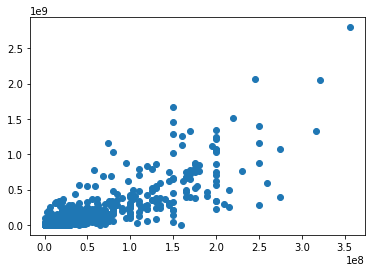

In [7]:
# Plot the data to see if a linear trend exists

plt.scatter(X, y)

In [8]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
# Create the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [10]:
# Fit the model to the training data. 

model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X_test)

mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error (MSE): {mse}")

r2 = r2_score(y_test, predicted)
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 2.3177479797129196e+16
R-squared (R2): 0.6239689238377804


In [12]:
# Call the `score` method on the model to show the r2 score

model.score(X_test, y_test)

0.6239689238377804

In [13]:
# Save the model as "movies_model_overall.pkl"

pickle.dump(model, open('movies_model_overall.pkl','wb'))

In [14]:
# Load model and predict income based on $ 200 million.

model = pickle.load(open('movies_model_overall.pkl','rb'))
print(model.predict([[200000000]]))

[[7.87197192e+08]]
